### Take-home exercise (40 points)
Find an interesting dataset for linear regression on Kaggle. Implement the normal equations and gradient descent then evaluate your model's performance.

Write a brief report on your experiments and results in the form of a Jupyter notebook.

Explain the dataset which you get and which rows which you use.
How many data in your dataset?

Write down your all code at below.
Show the results, goodness of fit and plot cost graph

In [1]:
NAME = "Kanawut Kaewnoparat"
ID = "st122109"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [3]:
data = pd.read_csv("insurance.csv")

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
data.select_dtypes(include = [int, float]).head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [9]:
data.select_dtypes(exclude= [int, float]).columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [10]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [11]:
categorical_col = data.select_dtypes(exclude= [int, float]).columns
for i in categorical_col:
    print(f"Unique valeus in {i}: {data[i].unique()}")
print(categorical_col)

Unique valeus in sex: ['female' 'male']
Unique valeus in smoker: ['yes' 'no']
Unique valeus in region: ['southwest' 'southeast' 'northwest' 'northeast']
Index(['sex', 'smoker', 'region'], dtype='object')


In [12]:
numerical_col = data.select_dtypes(include= [int, float]).columns
print(numerical_col)

Index(['age', 'bmi', 'children', 'charges'], dtype='object')


In [13]:
for index, value in enumerate(numerical_col):
    print(index, value)

0 age
1 bmi
2 children
3 charges


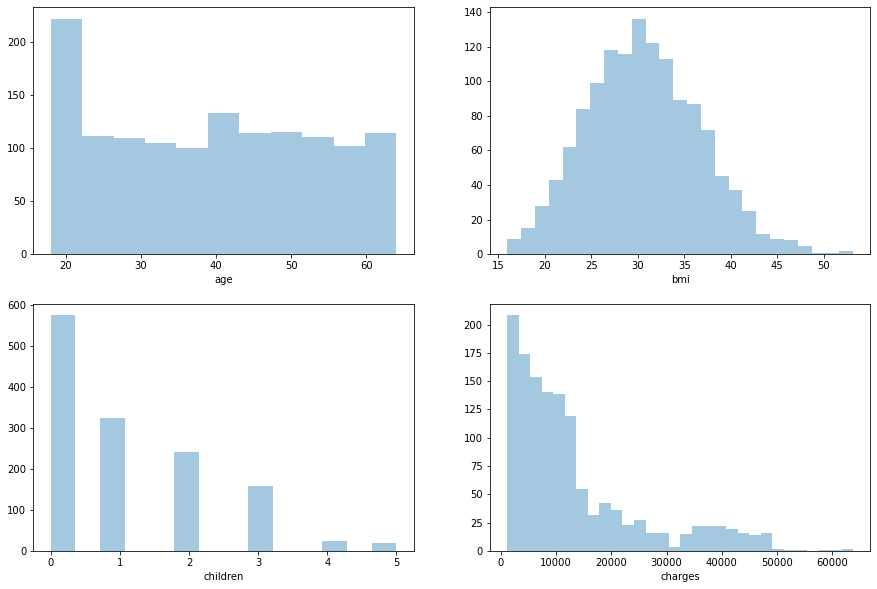

In [14]:
fig, axes = plt.subplots(2,2, figsize = (15,10))
sns.distplot(a = data['age'], kde = False, ax = axes[0,0] )
sns.distplot(a = data['bmi'], kde = False, ax = axes[0,1] )
sns.distplot(a = data['children'], kde = False, ax = axes[1,0] )
sns.distplot(a = data['charges'], kde = False, ax = axes[1,1] )

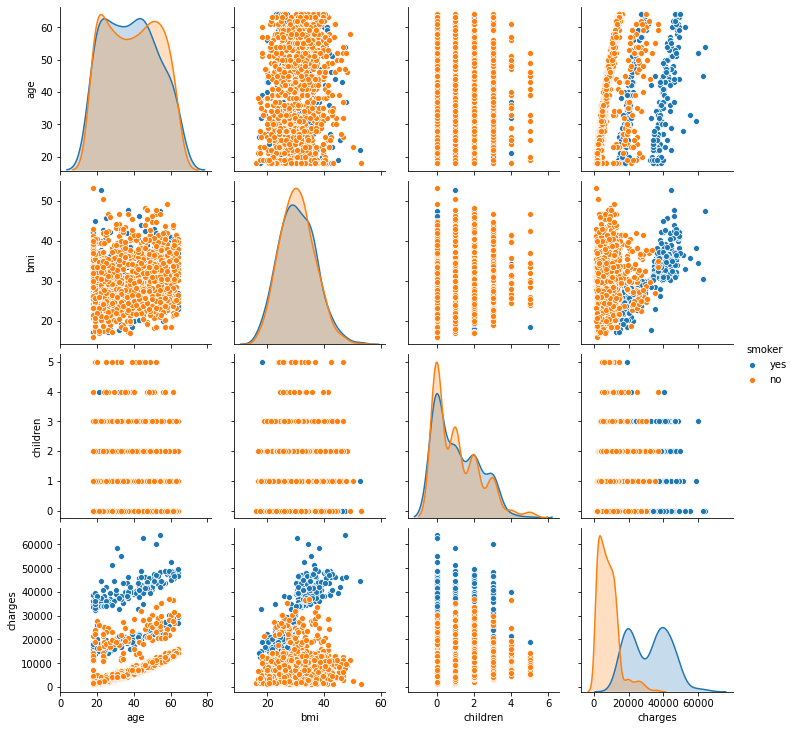

In [15]:
sns.pairplot(data, hue = 'smoker')

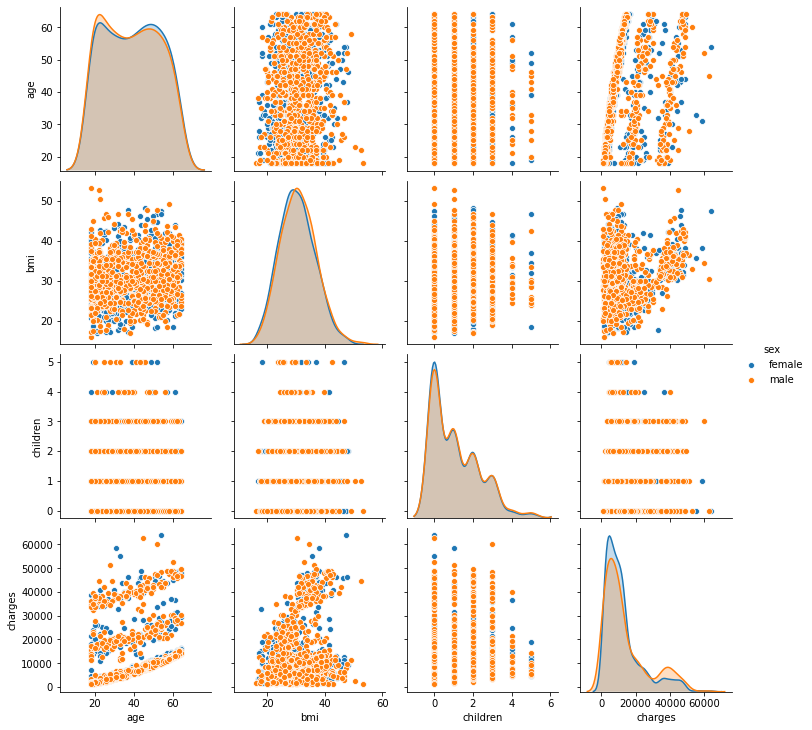

In [16]:
sns.pairplot(data, hue = 'sex')

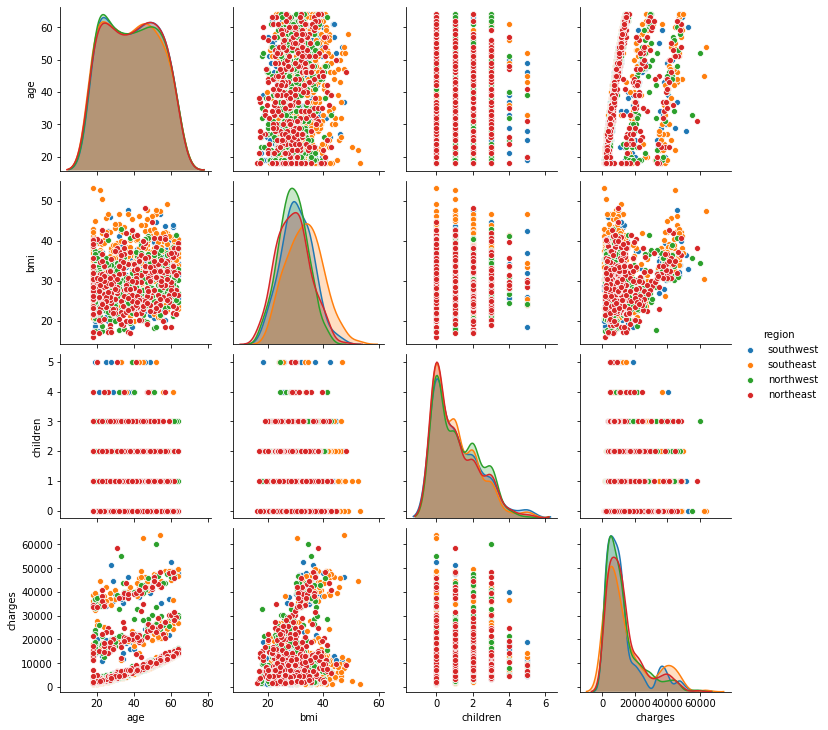

In [17]:
sns.pairplot(data, hue = 'region')

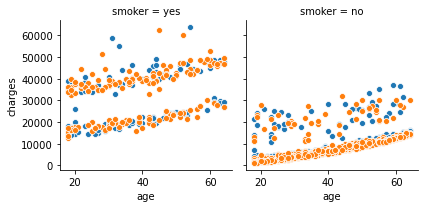

In [18]:
grid = sns.FacetGrid(data= data, col = 'smoker', hue = 'sex')
grid.map(sns.scatterplot, 'age', 'charges')

In [19]:
data[numerical_col].corr(method = 'kendall')

,age,bmi,children,charges
age,1.000000,0.073273,0.043253,0.475302
bmi,0.073273,1.000000,0.011562,0.082524
children,0.043253,0.011562,1.000000,0.103107
charges,0.475302,0.082524,0.103107,1.000000


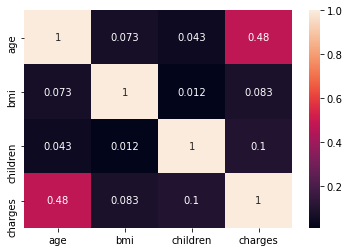

In [20]:
sns.heatmap(data[numerical_col].corr(method = 'kendall'), annot = True)

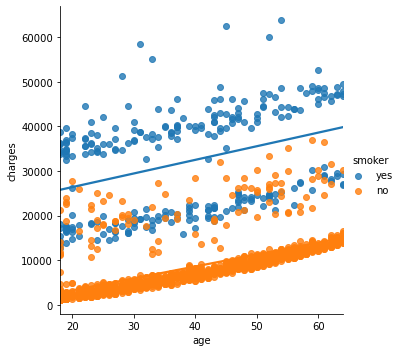

In [21]:
sns.lmplot(x = 'age', y='charges', data =data, ci = 0.95, hue = 'smoker')

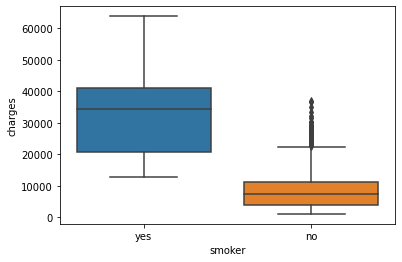

In [22]:
sns.boxplot(x = 'smoker', y='charges', data =data)

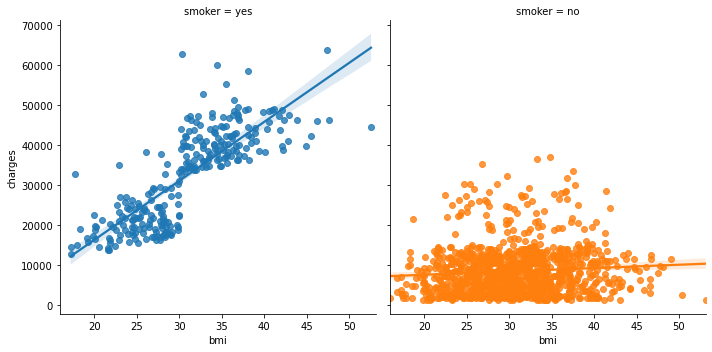

In [23]:
sns.lmplot(x = 'bmi', y ='charges', hue ='smoker', col = 'smoker', data = data)

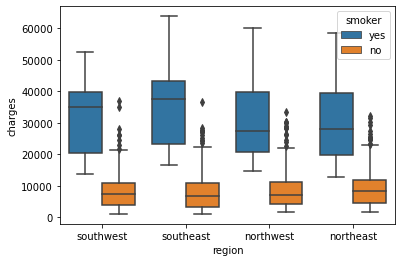

In [24]:
sns.boxplot(x = 'region', y ='charges', data = data, hue = 'smoker')

In [25]:
data[data['smoker'] == 'no'].describe()

,age,bmi,children,charges
count,1064.000000,1064.000000,1064.000000,1064.000000
mean,39.385338,30.651795,1.090226,8434.268298
std,14.083410,6.043111,1.218136,5993.781819
min,18.000000,15.960000,0.000000,1121.873900
25%,26.750000,26.315000,0.000000,3986.438700
50%,40.000000,30.352500,1.000000,7345.405300
75%,52.000000,34.430000,2.000000,11362.887050
max,64.000000,53.130000,5.000000,36910.608030


In [26]:
data['region'].value_counts(normalize = True)

southeast    0.272048
northwest    0.242900
southwest    0.242900
northeast    0.242152
Name: region, dtype: float64

In [27]:
data['sex'].value_counts(normalize = True)

male      0.505232
female    0.494768
Name: sex, dtype: float64

In [28]:
data['smoker'].value_counts(normalize = True)

no     0.795217
yes    0.204783
Name: smoker, dtype: float64

## SUMMARY FROM EXPLORING DATA
- This dataset contains 1,338 records, with 6 independent features and an invididual medical costs charged by health insurance as dependent variable
- This dataset contains no null values in any column
- Out of 6 features, 3 are numerical features: age, bmi and number of children, and 
- Out of 6 features, 3 are categorical features: sex, smoker status and region
- Graphing multiple pairplots, we see that the feature with most impact on medical cost/ charges is the smoker status
- For smoker, the interquartile cost ranges from 20k to 40k, with the median of around 36k
- For non-smoker, the interquartile cost ranges from only 4k to 11k, with the median of around 7k
- This mean that the medical cost for smokers could be as high as 5 times the cost for non-smokers!
- The slight problem from this summary might be the fact that sample size of smokers accounts for only 20% of entire dataset


In [29]:
X = data.iloc[:, data.columns != 'charges']
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [30]:
y= data.iloc[:, data.columns == 'charges']
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [31]:
X_numerical_col = X.select_dtypes(include =[int, float]).columns
X_categorical_col = X.select_dtypes(exclude =[int, float]).columns

print("Numerical column name: {}".format(X_numerical_col))
print("Numerical column name: {}".format(X_categorical_col))

Numerical column name: Index(['age', 'bmi', 'children'], dtype='object')
Numerical column name: Index(['sex', 'smoker', 'region'], dtype='object')


## Preprocessing Categorical Columns with OneHotEncoder

In [32]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse = False)
encoded = encoder.fit_transform(X[X_categorical_col ])
print(encoder.get_feature_names())

#create new encoded dataframe
X_categorical = pd.DataFrame(encoded, columns = encoder.get_feature_names())
X_categorical.head()

['x0_female' 'x0_male' 'x1_no' 'x1_yes' 'x2_northeast' 'x2_northwest'
 'x2_southeast' 'x2_southwest']


,x0_female,x0_male,x1_no,x1_yes,x2_northeast,x2_northwest,x2_southeast,x2_southwest
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [33]:
processed_X = X.drop(columns = ['sex', 'smoker', 'region'])

In [34]:
processed_X = pd.concat([processed_X, X_categorical], axis = 1)
processed_X.head()

,age,bmi,children,x0_female,x0_male,x1_no,x1_yes,x2_northeast,x2_northwest,x2_southeast,x2_southwest
0,19,27.900,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


## Preprocessing wiht TrainTestSplit

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(processed_X, y, test_size = 0.3)

In [36]:
print(X_train.shape)
print(y_train.shape)

(936, 11)
(936, 1)


## Preprocessing Numerical Columns with StandardScaler
The reasons to standardize data AFTER the split is to prevent data leakage from test set!


In [37]:
print(f"The numerical columns to be standardized is {X_numerical_col}")

The numerical columns to be standardized is Index(['age', 'bmi', 'children'], dtype='object')


In [38]:
X_mean = X_train[X_numerical_col].mean(axis = 0)
X_std = X_train[X_numerical_col].std(axis = 0)

In [39]:
X_train.head()

,age,bmi,children,x0_female,x0_male,x1_no,x1_yes,x2_northeast,x2_northwest,x2_southeast,x2_southwest
888,22,39.50,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
660,37,46.53,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
934,32,37.18,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1000,30,22.99,2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
97,55,38.28,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [40]:
X_train[X_numerical_col] = (X_train[X_numerical_col] - X_mean) / X_std

/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [41]:
X_train.head()

,age,bmi,children,x0_female,x0_male,x1_no,x1_yes,x2_northeast,x2_northwest,x2_southeast,x2_southwest
888,-1.216077,1.400738,-0.920626,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
660,-0.166162,2.551015,1.572255,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
934,-0.516134,1.021130,0.741295,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1000,-0.656122,-1.300696,0.741295,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
97,1.093737,1.201116,-0.920626,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [42]:
y_train.mean()

charges    13332.657562
dtype: float64

In [43]:
#scaling on y
y_mean = y_train.mean()
y_std = y_train.std()

In [44]:
y_train = (y_train - y_mean) / y_std

In [45]:
y_train.head()

,charges
888,-0.944175
660,-0.558968
934,-0.701787
1000,0.326538
97,-0.251755


## Create Linear Regression Model

Convert all the dataframe into numpy

In [46]:
X_train_ = X_train.to_numpy()
print(X_train_.shape)

y_train_ = y_train.to_numpy()
print(y_train_.shape)

(936, 11)
(936, 1)


In [47]:
#add intercept on the first index
X_train_ = np.insert(X_train_, 0,1 ,axis =1)
print(X_train_.shape)

(936, 12)


In [48]:
theta = np.zeros(X_train_.shape[1])
print(theta.shape)

(12,)


In [49]:
#must flatten the y_train so that it will become (m,) instead of (m,1)
y_train_ = y_train_.flatten()

In [50]:
predicted = np.dot(X_train_, theta)
print(predicted.shape)

error = predicted - y_train_
print(error.shape)

(936,)
(936,)


In [51]:
#To facilitate the computation, the threshold is set to early stop the gradient descent when the delta between loss < threshold

theta = theta = np.zeros(X_train_.shape[1])
threshold = 0.00000001
loss_record = [100,10]
count=0
r2_record = []
for i in range(100000):
    alpha = 0.0001
    predicted = np.dot(X_train_, theta)
    error = predicted - y_train_
    
    loss  = np.sum(error **2) / 2
    gradient = np.dot(X_train_.T, error)
    theta = theta - (alpha * gradient)
    loss_record.append(loss)
    r2 = 1 - np.sum((y_train_ - predicted) **2) / np.sum((y_train_ - np.mean(y_train_)) **2)
    r2_record.append(r2)
    count +=1
    if np.abs(loss_record[-1] - loss_record[-2]) < threshold:
        break
    else:
        pass
        
        
    if count % 50 ==0:
        print(f'{count}, loss: {loss}')


print(count)

50, loss: 128.41181349876595
100, loss: 110.29430994962246
150, loss: 109.08926523294164
200, loss: 109.00529897602448
250, loss: 108.99908625853412
300, loss: 108.99859178493294
350, loss: 108.99854921015694
400, loss: 108.99854526134013
416


## Plot loss function against iteration for training data

Text(0.5, 1.0, 'r2 function against iterations')

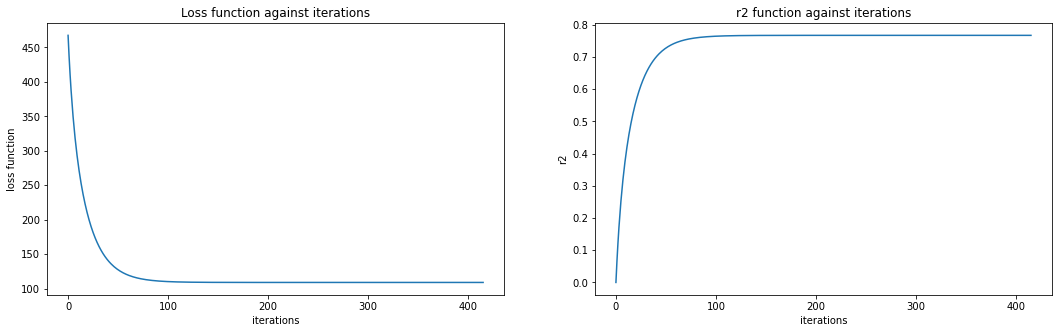

In [52]:
fig,axes = plt.subplots(1,2, figsize = (18,5))
axes[0].plot(np.arange(count), loss_record[2:])
axes[0].set_xlabel('iterations')
axes[0].set_ylabel('loss function')
axes[0].set_title('Loss function against iterations')

axes[1].plot(np.arange(count), r2_record)
axes[1].set_xlabel('iterations')
axes[1].set_ylabel('r2')
axes[1].set_title('r2 function against iterations')

In [53]:
theta

array([ 0.26594193,  0.29631842,  0.1631706 ,  0.04390204,  0.1315308 ,
        0.13441112, -0.85820643,  1.12414835,  0.13653553,  0.05243814,
        0.0451931 ,  0.03177515])

In [54]:
r2

0.7668480320081696

## Summary on performing linear regression on training data
- with alpha at 0.0001 and early stop in place, the model iterates for 416 times at the loss delta < 0.0001
- Using r2 as the metric, the score of this model is around 77%

## Perform on the test data

In [55]:
#must standardize the data using the mean and std of training dataset
X_test[X_numerical_col] = (X_test[X_numerical_col] - X_mean)  / X_std

/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [56]:
X_test.head()

,age,bmi,children,x0_female,x0_male,x1_no,x1_yes,x2_northeast,x2_northwest,x2_southeast,x2_southwest
840,-1.286071,0.026295,-0.920626,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
772,0.323799,0.906593,-0.920626,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
683,0.953748,-1.083076,-0.920626,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1039,-1.426060,-0.601203,0.741295,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
987,0.393793,-0.539026,-0.089666,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [57]:
y_test

,charges
840,1526.31200
772,12797.20962
683,9863.47180
1039,22493.65964
987,28340.18885
...,...
1327,9377.90470
737,3484.33100
767,7050.64200
515,11362.75500


In [58]:
y_test = (y_test - y_mean) / y_std
y_test.head()

,charges
840,-0.956841
772,-0.043395
683,-0.281159
1039,0.742450
987,1.216280


In [59]:
X_test_ = X_test.to_numpy()
y_test_ = y_test.to_numpy().flatten()
print(X_test_.shape)
print(y_test_.shape)

(402, 11)
(402,)


In [60]:
X_test_ = np.insert(X_test_, 0,1, axis =1)
print(X_test_.shape)

(402, 12)


In [61]:
yhat = np.dot(X_test_, theta)

In [62]:
r2_yhat = 1 - np.sum(y_test_ - yhat)**2 / np.sum((y_test_ - np.mean(y_test_))**2)
print(r2_yhat)

0.8030244597975953


# r2 of test model is at around 80%

In [63]:
theta

array([ 0.26594193,  0.29631842,  0.1631706 ,  0.04390204,  0.1315308 ,
        0.13441112, -0.85820643,  1.12414835,  0.13653553,  0.05243814,
        0.0451931 ,  0.03177515])

In [64]:
processed_X.columns

Index(['age', 'bmi', 'children', 'x0_female', 'x0_male', 'x1_no', 'x1_yes',
       'x2_northeast', 'x2_northwest', 'x2_southeast', 'x2_southwest'],
      dtype='object')

In [65]:
pd.DataFrame(np.array([theta]), columns = ['intercept', 'age', 'bmi', 'children', 'x0_female', 'x0_male',
       'x1_no', 'x1_yes', 'x2_northeast', 'x2_northwest', 'x2_southeast',
       'x2_southwest'])

,intercept,age,bmi,children,x0_female,x0_male,x1_no,x1_yes,x2_northeast,x2_northwest,x2_southeast,x2_southwest
0,0.265942,0.296318,0.163171,0.043902,0.131531,0.134411,-0.858206,1.124148,0.136536,0.052438,0.045193,0.031775


In [66]:
pd.DataFrame(np.array([theta]), columns = np.insert(processed_X.columns.to_numpy(), 0, 'intercept'))

,intercept,age,bmi,children,x0_female,x0_male,x1_no,x1_yes,x2_northeast,x2_northwest,x2_southeast,x2_southwest
0,0.265942,0.296318,0.163171,0.043902,0.131531,0.134411,-0.858206,1.124148,0.136536,0.052438,0.045193,0.031775


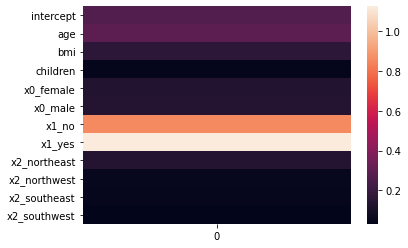

In [67]:
sns.heatmap(np.abs(pd.DataFrame(np.array([theta]), columns = np.insert(processed_X.columns.to_numpy(), 0, 'intercept'))).T)

The heatmap highlights the above-mentioned summary that 'smoker' status is the important feature to affect the medical costs

## Now try analytical solution
I need to reset the first index 'intercept' to something close to 1 but 1 to avoid the multicollinearity that will return an error when trying to find the inverse matrix

I first tried with 1 as normal to find the repeated error of 'singular matrix' because in my X_train_, it looks like there are some columns that are linearly dependent on other columns

For example, for the 'intercept' column, the computer deems it dependent on the sum of One-hot-encoded male/ female or smoke / no smoke!!!

To avoid the singular error, I need to avoid assigning 'intercept' as the sum of any number of one-hot-encoded, so I used float number close to 1

The below is the old code that returns error from singular matrix (as reference to see how it blocks me from futher coding)

In [280]:
#DO NOT RUN THIS CODE; it just to serves as reference for how the singular matrix coud not be inverted

analytical_theta = np.linalg.inv(np.dot(X_train_.T, X_train_)) @ X_train_.T @ y_train_

LinAlgError: Singular matrix

In [286]:
#DO NOT RUN THIS CODE; it just serves as reference for how the singular matrix coud not be inverted
#see that intercept columns ~  (X_female + X-male)
X_train.T @  X_train

,intercept,age,bmi,children,x0_female,x0_male,x1_no,x1_yes,x2_northeast,x2_northwest,x2_southeast,x2_southwest
intercept,9.360000e+02,1.243450e-14,2.209344e-12,7.549517e-15,447.000000,489.000000,755.000000,181.000000,229.000000,250.000000,236.000000,221.000000
age,1.243450e-14,9.350000e+02,1.067586e+02,2.631458e+01,25.419350,-25.419350,-1.732732,1.732732,0.803845,-10.825106,6.287851,3.733411
bmi,2.209344e-12,1.067586e+02,9.350000e+02,1.090044e+01,-13.069588,13.069588,3.482977,-3.482977,-55.448679,-55.137573,109.965555,0.620697
children,7.549517e-15,2.631458e+01,1.090044e+01,9.350000e+02,-20.315360,20.315360,1.824681,-1.824681,-25.382659,11.644860,-5.703107,19.440906
x0_female,4.470000e+02,2.541935e+01,-1.306959e+01,-2.031536e+01,447.000000,0.000000,377.000000,70.000000,106.000000,120.000000,112.000000,109.000000
x0_male,4.890000e+02,-2.541935e+01,1.306959e+01,2.031536e+01,0.000000,489.000000,378.000000,111.000000,123.000000,130.000000,124.000000,112.000000
x1_no,7.550000e+02,-1.732732e+00,3.482977e+00,1.824681e+00,377.000000,378.000000,755.000000,0.000000,181.000000,208.000000,183.000000,183.000000
x1_yes,1.810000e+02,1.732732e+00,-3.482977e+00,-1.824681e+00,70.000000,111.000000,0.000000,181.000000,48.000000,42.000000,53.000000,38.000000
x2_northeast,2.290000e+02,8.038445e-01,-5.544868e+01,-2.538266e+01,106.000000,123.000000,181.000000,48.000000,229.000000,0.000000,0.000000,0.000000
x2_northwest,2.500000e+02,-1.082511e+01,-5.513757e+01,1.164486e+01,120.000000,130.000000,208.000000,42.000000,0.000000,250.000000,0.000000,0.000000


---

In [323]:
X_train_[:,0] = 1.001

X_train

In [324]:
X_train_

array([[ 1.001     , -1.21607708,  1.40073753, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.001     , -0.16616181,  2.55101484, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.001     , -0.51613356,  1.02112966, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.001     , -0.44613921, -0.43676093, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.001     , -0.65612227, -1.47168325, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.001     ,  0.53378171,  0.22264413, ...,  0.        ,
         0.        ,  1.        ]])

In [325]:
np.linalg.inv(np.dot(X_train_.T ,X_train_)) @ X_train_.T @ y_train_

array([-1.63208170e+13,  2.94971694e-01,  1.70423816e-01,  4.41698075e-02,
        1.63371378e+13,  1.63371378e+13,  5.43371206e-01,  2.50131628e+00,
       -1.41890509e-01, -2.51389241e-01, -2.48455862e-01, -3.10711286e-01])

In [326]:
theta

array([ 0.26594193,  0.29631842,  0.1631706 ,  0.04390204,  0.1315308 ,
        0.13441112, -0.85820643,  1.12414835,  0.13653553,  0.05243814,
        0.0451931 ,  0.03177515])

In [327]:
analytical_theta = np.linalg.inv(np.dot(X_train_.T ,X_train_)) @ X_train_.T @ y_train_

### Analytical method on train data

In [328]:
analytical_yhat_train = np.dot(X_train_, analytical_theta)
analytical_yhat_r2 = 1 - np.sum((y_train_ - analytical_yhat_train)**2) / np.sum((y_train_ - np.mean(y_train_))**2)

In [329]:
sse = np.sum((y_train_ - analytical_yhat_train)**2)
tse = np.sum((y_train_ - np.mean(y_train_))**2)
print(f"sse: {sse}")
print(f"tse: {tse}")
print(f"r2: {analytical_yhat_r2}")

sse: 233.41438426728513
tse: 935.0
r2: 0.7503589473077165


### Analytical method on test data

In [330]:
X_test_[:,0] = 1.001

In [331]:
analytical_yhat_test = np.dot(X_test_, analytical_theta)
analytical_yhat_r2_test = 1 - np.sum((y_test_ - analytical_yhat_test)**2) / np.sum((y_test_ - np.mean(y_test_))**2)

In [332]:
sse = np.sum((y_test_ - analytical_yhat_test)**2)
tse = np.sum((y_test_ - np.mean(y_test_))**2)
print(f"sse: {sse}")
print(f"tse: {tse}")
print(f"r2: {analytical_yhat_r2_test}")

sse: 108.09617334970144
tse: 352.78158601985206
r2: 0.6935889580596801


## SUMMARY OF LINEAR REGRESSION USING GRADIENT DESCENT vs NORMAL EQUATIONS
- r2 of gradient descent method on training dat ~ 77% and ~80% on the test data
- r2 of analytical method on training data ~ 75% and ~69% on the test data
- the performance of gradient descent method is slightly better on training data, but noticeably higher than 

--- 